### **On the Problem of Predicting Wheater a Data Science Candidate is Ready to Leave Their Job** 

## 1. Introduction

Human resource departments at companies and institutions face the usual challenge of sorting hundreds to thousands of applications to identify those candidates who are most likely to leave their present employment. Although a decision to leave depends strongly on the offer received, experience determines that candidates have various levels of predisposition based only on their current circumstances. Ranking candidates according to that predisposition allows HR departments to focus their resources on those candidates that are most likely to change jobs. 

To start exploring this problem, Team 4 selected a dataset from Kaggle titled "HR Analytics: Job Change of Data Scientists." https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists.


This dataset contains information about a large pool of potential candidates at a hypothetical company. That information includes their gender, relevant experience, education level, current company type and size, city index of development, years since been hired for the last job, etc., and the expressed desire to either leave their current position or likely to stay in it.

The purpose of our project is to do Exploratory Data Analysis to examine the database, and then determine what features appear as better determinant of the outcome for each candidate in the database: likely to leave or likely to stay.  Full statistical analysis to generate a model capable of predicting the binary outcome from mostly categorical variables, is outside the project scope at this stage.

The questions to investigate are:
1) Which gender is most probable to leave their current job?
2) What type of company will employees most likely leave?
3) Does more training time lead to candidates more likly to leave their current job?
4) Are people likely to change their jobs when they have experience that is more relevant to the position?



The features of the data are as follows:

*   enrollee_id : Unique ID for candidate - categorical 
*   city: City code - discrete
*   city_development_index : Development index of the city (scaled) - continuous
*   gender: Gender of candidate - categorical
*   relevant_experience: Relevant experience of candidate - categorical
*   enrolled_university: Type of University course enrolled if any - categorical
*   education_level: Education level of candidate - categorical
*   major_discipline: Education major discipline of candidate - categorical
*   experience: Candidate total experience in years - discrete
*   company_size: No of employees in current employer's company - discrete
*   company_type : Type of current employer - categorical
*   lastnewjob: Difference in years between previous job and current job -4 discrete
*   training_hours: training hours completed - continuous
*   target: 0 – Not looking for job change, 1 – Looking for a job change - binary

## 2. Data Ingestion & Wrangling

In [ ]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Download source files into google colab drive, from desktop; the alternative is to read directly from kaggle
from google.colab import files
target = files.upload()

Saving jobchange_test_target_values.npy to jobchange_test_target_values.npy


In [ ]:
# Check: list files in google colab current directory
import os
from os import listdir

for f in os.listdir('.'):
  if os.path.isfile(f):
    print(f)

jobchange_test_target_values.npy


In [ ]:
# Load the target data for the test set, provided as a numpy array
target =  np.load('jobchange_test_target_values.npy')

In [ ]:
# Viewing the length 
len(target)

2129

In [ ]:
# Load the test set, provided as a CSV file
testdata = pd.read_csv('aug_test.csv',sep=',')

In [ ]:
# Viewing the length
len(testdata)

2129

In [ ]:
# Correct typo in 'relevent'
testdata['relevent_experience'] = testdata['relevent_experience'].str.replace('relevent', 'relevant')
testdata.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})

In [ ]:
testdata[0:5]  # test data without the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [ ]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [ ]:
#  Append the column with targets to testdata 
testdata['target'] = target    

In [ ]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [ ]:
# Load the training set, provided as a CSV file
training = pd.read_csv('aug_train.csv',sep=',')

In [ ]:
# Viewing the length
len(training)

19158

In [ ]:
# Correct typo in 'relevent'
training['relevent_experience'] = training['relevent_experience'].str.replace('relevent', 'relevant')
training.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
# Save the test set with target column included
testdata.to_csv ('aug_test1.csv', sep = ',')

In [ ]:
# Checking to see how many null values
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# Dropping all the nulls 
new_training = training.dropna()

In [ ]:
# Viewing new dataset
new_training.shape

(8955, 14)

In [ ]:
# Checking that there are no more nulls
new_training.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
# Viewing head of new data
new_training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Counting the target data, showing that it is imbalanced
new_training.value_counts('target')

target
0.0    7472
1.0    1483
dtype: int64

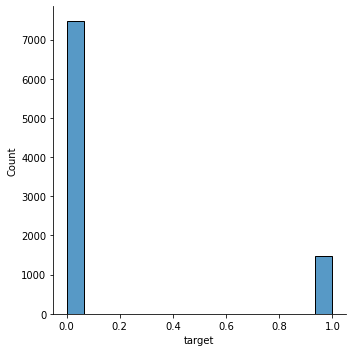

In [ ]:
# Plotting the amount of target data, showing that it is imbalanced
sns.displot(new_training['target'])
plt.show()

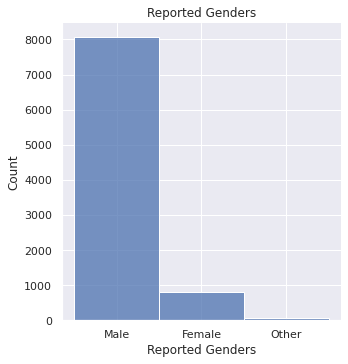

In [ ]:
# Graph of the number of genders reported in dataset
sns.set_theme(style="darkgrid")
sns.displot(new_training['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

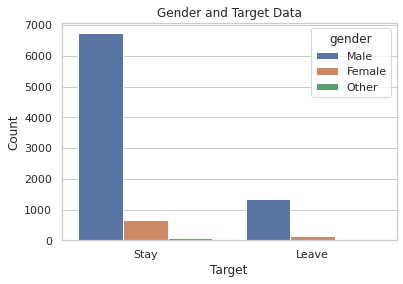

In [ ]:
# Bargraph of the number of people who are willing to leave/stay based on gender
sns.set_theme(style="whitegrid")
sns.countplot(x='target',hue='gender',data=new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Gender and Target Data')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

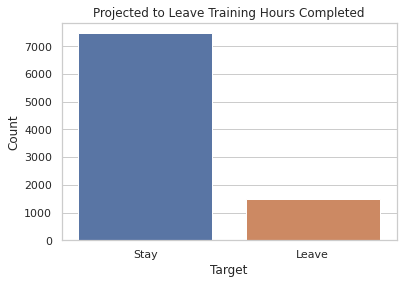

In [ ]:
# Bargraph of the number of people who are willing to leave/stay in dataset
sns.countplot(x='target', data = new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Projected to Leave Training Hours Completed')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

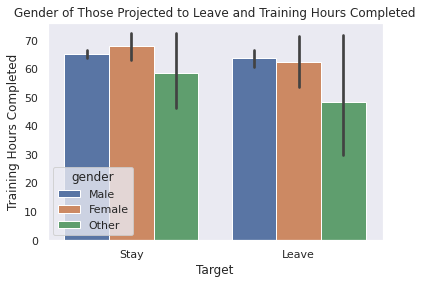

In [ ]:
# Barplot of the genders of people who are willing to leave/stay and the training hours completed
sns.set_theme(style="dark")
sns.barplot(x="target", y="training_hours", hue="gender", data=new_training)
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.xlabel('Target')
plt.ylabel('Training Hours Completed')
plt.title('Gender of Those Projected to Leave and Training Hours Completed')
plt.show()

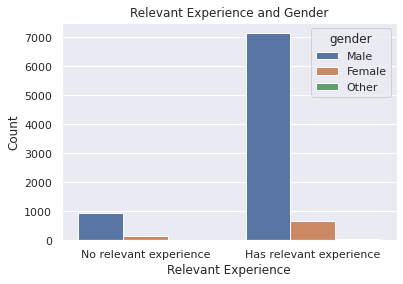

In [ ]:
# Bargraph counting those with relevant experience based on gender
sns.set_theme(style="darkgrid")
sns.countplot(x='relevant_experience', hue = 'gender',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience and Gender')
plt.show()

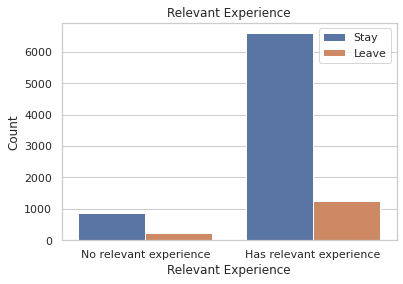

In [ ]:
# Bargraph counting those who have relevent experience based on likelihood of leaving/staying
sns.set_theme(style="whitegrid")
sns.countplot(x ='relevant_experience', hue ='target',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience')
plt.legend(('Stay','Leave'))
plt.show()

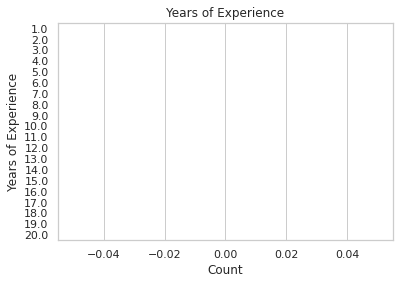

In [ ]:
# Graph on how many different years of experiences employeees have
experience_order = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0]
sns.countplot(y='experience',data=new_training, order= experience_order  )
plt.xlabel('Count')
plt.ylabel('Years of Experience')
plt.title('Years of Experience')
plt.show()

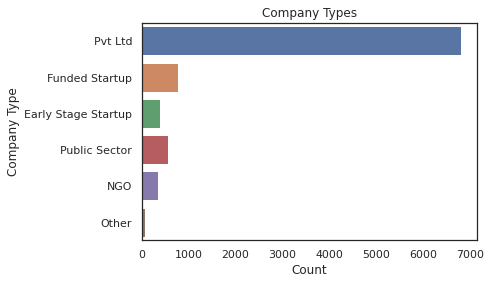

In [ ]:
# Bargraph counting the types of companies in dataset
sns.set_theme(style="white")
sns.countplot(y='company_type',data=new_training)
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Types')
plt.show()

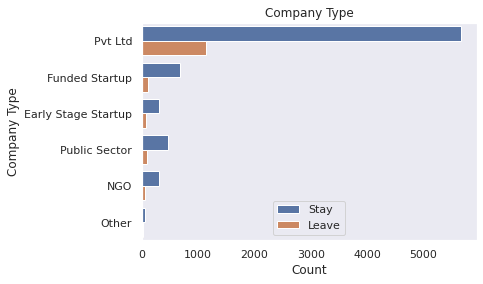

In [ ]:
# Graph counting the types of companies and how many employees are/are not willing to leave
sns.set_theme(style="dark")
sns.countplot(y='company_type',hue= 'target', data=new_training)
plt.legend(('Stay','Leave'), loc='lower center')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Type')
plt.show()

## 4. Simulate a nonparametric inference of the Median for a quantitative variable


4a. Bootstrapping

Median of the original training set:  47.0
Bootstrap median (red line):  47.0
95% Confidence interval (yellow lines): [44.  50.5]


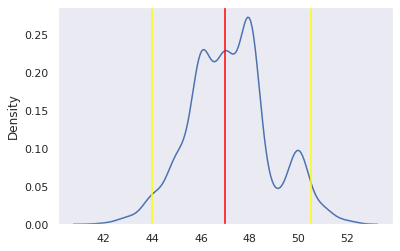

In [ ]:
# (bootstrapping inference of median of 'training_hours' array)
print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []
for i in range (1000):
  boot_sample = np.random.choice(training['training_hours'], 1000)
  median_boot_samples.append(np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

conf_int = np.percentile(median_boot_samples, [2.5, 97.5])     #confidence interval, central 95%
print ("95% Confidence interval (yellow lines):", conf_int)

sns.kdeplot (median_boot_samples)      # plot the distribution, indicate median, conf. int.
plt.axvline (bootstrap_median, color = 'red')
for ends in conf_int:
  plt.axvline (ends, color = 'yellow')


In [ ]:
## implement bootstrapping to infer the median of 'training_hours', using sklearn resample
from sklearn.utils import resample

print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []

for i in range (100):
  boot_sample = resample(training['training_hours'], replace=True, random_state=1)
  median_boot_samples.append (np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

Median of the original training set:  47.0
Bootstrap median (red line):  47.0


4b. Calculating probabilites

In [ ]:
# Calculate probability of leaving for each category,  defined as P = Leave/(Leave+Stay)

In [ ]:
counts = new_training.groupby(['gender','target']).size().reset_index(name='counts')
counts

,gender,target,counts
0,Female,0.0,673
1,Female,1.0,131
2,Male,0.0,6733
3,Male,1.0,1340
4,Other,0.0,66
5,Other,1.0,12


In [ ]:
Pfem = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmal = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Poth = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for females: ', Pfem, '; males: ', Pmal,'; Other: ', Poth)

Probabilities for females:  0.16293532338308458 ; males:  0.16598538337668772 ; Other:  0.15384615384615385


In [ ]:
counts = new_training.groupby(['education_level','target']).size().reset_index(name='counts')
counts

,education_level,target,counts
0,Graduate,0.0,5160
1,Graduate,1.0,1092
2,Masters,0.0,2092
3,Masters,1.0,357
4,Phd,0.0,220
5,Phd,1.0,34


In [ ]:
Pgra = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmst = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphd = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for Graduates: ', Pgra,'; Masters: ', Pmst,'; PhDs: ', Pphd)

Probabilities for Graduates:  0.1746641074856046 ; Masters:  0.14577378521845652 ; PhDs:  0.13385826771653545


In [ ]:
# Probabilities for subcategories:   gender in each education_level

counts = new_training.groupby(['education_level','gender','target']).size().reset_index(name='counts')
counts

,education_level,gender,target,counts
0,Graduate,Female,0.0,441
1,Graduate,Female,1.0,85
2,Graduate,Male,0.0,4669
3,Graduate,Male,1.0,995
4,Graduate,Other,0.0,50
5,Graduate,Other,1.0,12
6,Masters,Female,0.0,194
7,Masters,Female,1.0,42
8,Masters,Male,0.0,1882
9,Masters,Male,1.0,315


In [ ]:
Pgraf = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmstf = counts.loc[7,'counts'] / (counts.loc[6,'counts'] + counts.loc[3,'counts'])
Pphdf = counts.loc[12,'counts'] / (counts.loc[11,'counts'] + counts.loc[5,'counts'])
Pgram = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[1,'counts'])
Pmstm = counts.loc[9,'counts'] / (counts.loc[8,'counts'] + counts.loc[3,'counts'])
Pphdm = counts.loc[14,'counts'] / (counts.loc[13,'counts'] + counts.loc[5,'counts'])
Pgrao = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[1,'counts'])
Pmsto = 0. / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphdo = 0. / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for female graduates: ', Pgraf,'; female masters:', Pmstf,'; female PhDs:', Pphdf)
print ('Probabilities for male graduates: ', Pgram,'; male masters:', Pmstm,'; male PhDs:', Pphdm)
print ('Probabilities for other graduates: ', Pgrao,'; other masters:' ,Pmsto,'; other PhDs:', Pphdo)

Probabilities for female graduates:  0.16159695817490494 ; female masters: 0.03532380151387721 ; female PhDs: 0.08
Probabilities for male graduates:  0.20929743374000842 ; male masters: 0.10948905109489052 ; male PhDs: 0.15463917525773196
Probabilities for other graduates:  0.08888888888888889 ; other masters: 0.0 ; other PhDs: 0.0


In [80]:
# Looking at other categorical variables: major_discipline and the average target (1: likely to leave)
new_training.drop('enrollee_id', axis=1).groupby('major_discipline').mean()

,city_development_index,experience,training_hours,target
major_discipline,,,,
Arts,0.907961,8.247423,56.224806,0.069767
Business Degree,0.878659,8.369748,70.482353,0.123529
Humanities,0.900392,7.864469,66.124339,0.105820
No Major,0.863777,9.333333,59.687500,0.133929
Other,0.860650,8.438849,61.728814,0.107345
STEM,0.839554,9.384812,65.202779,0.172612


In [ ]:
# Looking at other categorical variables: company_type and the average target
new_training.drop('enrollee_id', axis=1).groupby('company_type').mean()

,city_development_index,training_hours,target
company_type,,,
Early Stage Startup,0.807151,69.441558,0.202597
Funded Startup,0.853381,67.178571,0.137755
NGO,0.856022,63.117978,0.154494
Other,0.870667,69.305556,0.208333
Public Sector,0.871012,59.132979,0.166667
Pvt Ltd,0.842602,65.135708,0.166765


In [ ]:
# Looking at other categorical variables: relevant_experience and the average target
new_training.drop('enrollee_id', axis=1).groupby('relevant_experience').mean()

,city_development_index,training_hours,target
relevant_experience,,,
Has relevant experience,0.844350,65.472042,0.160489
No relevant experience,0.846132,62.250906,0.201993


In [ ]:
# Plotting the years of experience against average target

new_training.experience = pd.to_numeric(new_training.experience, errors='coerce')
dfnew = new_training.drop('enrollee_id', axis=1).groupby('experience', as_index=False)['target'].mean()
dfnew

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,experience,target
0,1.0,0.429752
1,2.0,0.245791
2,3.0,0.292056
3,4.0,0.231250
4,5.0,0.246957
5,6.0,0.218692
6,7.0,0.226804
7,8.0,0.193467
8,9.0,0.178236
9,10.0,0.156080


<function matplotlib.pyplot.title>

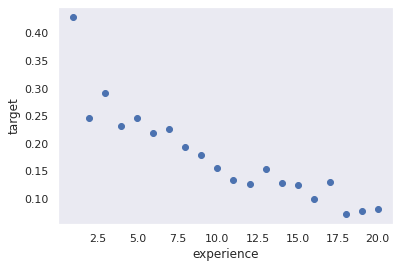

In [ ]:
x, y = dfnew.experience, dfnew.target

plt.scatter(x, y, marker='o') ;
plt.xlabel('experience')
plt.ylabel('target')
plt.title


In [ ]:
# Getting basic statistics on city development index
new_training['city_development_index'].describe()

count    8955.000000
mean        0.844570
std         0.116178
min         0.448000
25%         0.794000
50%         0.910000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64

In [ ]:
# Binning the city_development_index to create 'City_class" and examine average target for each class
bins = [0.4,.82,.919,.92,.96]
labels = ['.40-.82', '.821-.91','.911-.930','.931-.960']
new_training['City_class'] = pd.cut(new_training.city_development_index, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('City_class', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,City_class,city_development_index,experience,training_hours,target
0,.40-.82,0.670677,7.753785,65.545822,0.376665
1,.821-.91,0.891245,10.053611,63.705711,0.076282
2,.911-.930,0.920000,9.728141,65.775380,0.094093
3,.931-.960,0.928850,10.453450,65.185304,0.080671


In [ ]:
# Creating 'Training_hr' as bins of training hours to examine mean target for each class
new_training['experience'].describe()

count    6977.000000
mean        9.272753
std         4.887231
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        20.000000
Name: experience, dtype: float64

In [ ]:
bins = [0,5,9,12,16,20]
labels = ['0-5', '5.1-9','9.1-12','12.1-16', '16.1-20']
new_training['Training_hr'] = pd.cut(new_training.training_hours, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('Training_hr', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Training_hr,city_development_index,experience,training_hours,target
0,0-5,0.833728,9.198925,3.664000,0.192000
1,5.1-9,0.845561,9.439883,7.493243,0.182432
2,9.1-12,0.844767,9.321070,11.037433,0.171123
3,12.1-16,0.848122,9.981132,14.547500,0.167500
4,16.1-20,0.848012,9.492105,18.480249,0.149688


In [ ]:
# Looking at company_type
new_training['company_type'].describe()

count        8955
unique          6
top       Pvt Ltd
freq         6794
Name: company_type, dtype: object

In [ ]:
# Looking at years since 'last_new_job'
new_training['last_new_job'].describe()

count     8955
unique       6
top          1
freq      3838
Name: last_new_job, dtype: object

In [ ]:
# Implementing sklearn LogisticRegression

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
testdata.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevant_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
target                      0
dtype: int64

In [ ]:
new_testdata = testdata.dropna()
new_testdata.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [ ]:
new_testdata[:10]

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0
11,9272,city_90,0.698,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51,1.0
12,14249,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48,0.0
16,7865,city_21,0.624,Male,Has relevant experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4,0.0
17,7463,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,Business Degree,2,50-99,Pvt Ltd,1,31,1.0
22,25202,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,6,1000-4999,Pvt Ltd,3,33,1.0
24,23570,city_118,0.722,Male,Has relevant experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,>4,19,0.0
26,9548,city_114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,65,0.0
33,17189,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,4,43,0.0


4c. Logistic Regression

In [ ]:
# Prepare data for LogisticRegression method, requiring all numerical predictor variables

new_training2 = new_training.append(new_testdata)     # append training and testing originally provided
new_training2 = new_training.drop(['enrollee_id'], axis=1)     #  drop enrollee_id, not used as predictor
new_training2.head()

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,City_class,Training_hr
1,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0,.40-.82,NaN
4,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,NaN,50-99,Funded Startup,4,8,0.0,.40-.82,5.1-9
7,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0,.40-.82,16.1-20
8,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0,.911-.930,NaN
11,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0,.911-.930,NaN


In [ ]:
new_training2.shape

(8955, 15)

In [ ]:
# Convert columns that contain mixed characters and numbers to numbers
#   so that these columns will now be numeric: 'experience','city','company_size','last_new_job'

new_training2.loc[new_training2.experience == '<1','experience'] = "0"   
new_training2.loc[new_training2.experience == '>20','experience'] = "25"   # numeric assignment of >20 to 25
new_training2['city'] = new_training2['city'].str.replace('city_', '')        #convert city codes to numbers
new_training2.loc[new_training2.company_size == '<10','company_size'] = "5"   # numeric assignment of <10 to 5
new_training2.loc[new_training2.company_size == '10000+','company_size'] = "12000"   # numeric assignment of >10000 to 13000
new_training2.loc[new_training2.company_size == '10/49','company_size'] = "30"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '50-99','company_size'] = "75"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '100-500','company_size'] = "300"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '500-999','company_size'] = "750"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '1000-4999','company_size'] = "3000"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '5000-9999','company_size'] = "7500"  # numeric assignment of range to the average
new_training2.loc[new_training2.last_new_job == '>4','last_new_job'] = "5" # numeric assignment of >4 to 5
new_training2.loc[new_training2.last_new_job == 'never','last_new_job'] = "0" # numeric assignment of never to 0
new_training2[['experience','city','company_size','last_new_job','training_hours']] = new_training2[['experience','city','company_size','last_new_job','training_hours']].apply(pd.to_numeric)
new_training2[:10]


,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,City_class,Training_hr
1,40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15.0,75,Pvt Ltd,5,47,0.0,.40-.82,NaN
4,162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,NaN,75,Funded Startup,4,8,0.0,.40-.82,5.1-9
7,46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13.0,5,Pvt Ltd,5,18,1.0,.40-.82,16.1-20
8,103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7.0,75,Pvt Ltd,1,46,1.0,.911-.930,NaN
11,103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5.0,7500,Pvt Ltd,1,108,0.0,.911-.930,NaN
12,61,0.913,Male,Has relevant experience,no_enrollment,Graduate,STEM,NaN,3000,Pvt Ltd,3,23,0.0,.821-.91,NaN
15,114,0.926,Male,Has relevant experience,no_enrollment,Graduate,STEM,16.0,30,Pvt Ltd,5,18,0.0,.931-.960,16.1-20
20,159,0.843,Male,Has relevant experience,no_enrollment,Masters,STEM,11.0,300,Pvt Ltd,1,68,0.0,.821-.91,NaN
21,114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,11.0,300,Pvt Ltd,2,50,0.0,.931-.960,NaN
23,40,0.776,Male,Has relevant experience,no_enrollment,Graduate,Humanities,NaN,3000,Pvt Ltd,1,65,0.0,.40-.82,NaN


In [ ]:
#  Use pd.get_dummies to convert categorical variables to numeric

In [ ]:
new_training3 = pd.get_dummies(new_training2, columns=['gender','relevant_experience','enrolled_university','education_level','major_discipline','company_type'])

In [ ]:
new_training3

,city,city_development_index,experience,company_size,last_new_job,training_hours,target,City_class,Training_hr,gender_Female,gender_Male,gender_Other,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_Masters,education_level_Phd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,40,0.776,15.0,75,5,47,0.0,.40-.82,NaN,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,162,0.767,NaN,75,4,8,0.0,.40-.82,5.1-9,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
7,46,0.762,13.0,5,5,18,1.0,.40-.82,16.1-20,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,103,0.920,7.0,75,1,46,1.0,.911-.930,NaN,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
11,103,0.920,5.0,7500,1,108,0.0,.911-.930,NaN,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21,0.624,1.0,300,1,52,1.0,.40-.82,NaN,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
19149,103,0.920,9.0,75,1,36,1.0,.911-.930,NaN,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
19150,160,0.920,10.0,300,3,23,0.0,.911-.930,NaN,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
19152,103,0.920,7.0,30,1,25,0.0,.911-.930,NaN,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
#  Use these lines to add columns of 0's for other educational levels that may exist in test data
#new_training3['education_level_High_School'] = 0
#new_training3['education_level_Primary_School'] = 0
#new_training3

In [ ]:
#  Allocate the target variable to the y array and the predictor variables to the X array

y = new_training3['target']
X = new_training3.drop(['target'], axis=1)

#  Use  sklearn train_test_split to create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print ("X_train shape: ", X_train.shape)
print ("y_train shape: ", y_train.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train)

X_train shape:  (7164, 31)
y_train shape:  (7164,)
X_test shape:  (1791, 31)
y_test shape:  (1791,)


pandas.core.frame.DataFrame

In [ ]:
# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train, y_train)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test))


ValueError: ignored

In [ ]:
#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print (cnf_matrix)
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Predictions']
z.iloc[:10]

In [ ]:
print (metrics.classification_report(y_test, y_pred))

In [ ]:
#  Using SMOTE  to  try to resolve the imbalanced target problem


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE (random_state=42, ratio='minority')
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [ ]:
# See the new shape

print ("X_train shape: ", X_train_SMOTE.shape)
print ("y_train shape: ", y_train_SMOTE.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train_SMOTE)

In [ ]:
# Repeat the Logistic Regression and Prediction

# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train_SMOTE, y_train_SMOTE)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test))
#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print (cnf_matrix)
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print (metrics.classification_report(y_test, y_pred))

# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 5. Conclusion
